# 1번

In [18]:
import numpy as np
import pandas as pd
from random import random, seed
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gamma, gaussian_kde
import matplotlib.animation as animation

## (a) Sample at least 5,000 y values from the posterior predictive distribution.

In [19]:
np.random.seed(2016131015)
sigma = gamma.rvs(a=10, scale=1/2.5, size=5000)
sigma

array([3.41113219, 4.26947369, 6.19556875, ..., 4.07998045, 3.90093106,
       6.61904702])

In [21]:
np.random.seed(1)
theta = []
for i in range(len(sigma)):
    theta=np.append(theta,norm.rvs(loc=4.1, scale = np.sqrt((sigma[i])/20), size=1))
theta

array([4.77083027, 3.81734888, 3.80603152, ..., 3.74951541, 4.57913106,
       5.38978197])

In [23]:
np.random.seed(2016131015)

y = []
for i in range(len(sigma)):
    y=np.append(y,
                   0.31 * norm.rvs(loc = theta[i], scale = np.sqrt(sigma[i]), size = 1) + 
                   0.46 * norm.rvs(loc = 2 * theta[i], scale = 2 * np.sqrt(sigma[i]), size = 1) +
                   0.23 * norm.rvs(loc = 3 * theta[i], scale = 3 * np.sqrt(sigma[i]), size = 1))
y

array([11.00295685, 10.15837612,  4.35565706, ...,  6.51887794,
        9.93552483, 10.46955089])

## (b) Form a 75% quantile-based confidence interval for a new value of Y.

In [24]:
CI = (np.quantile(y_mc, 0.125), np.quantile(y_mc, 0.875))
CI

NameError: name 'y_mc' is not defined

## (c) Form a 75% HPD(Highest Posterior Density) region for a new Y as follows:

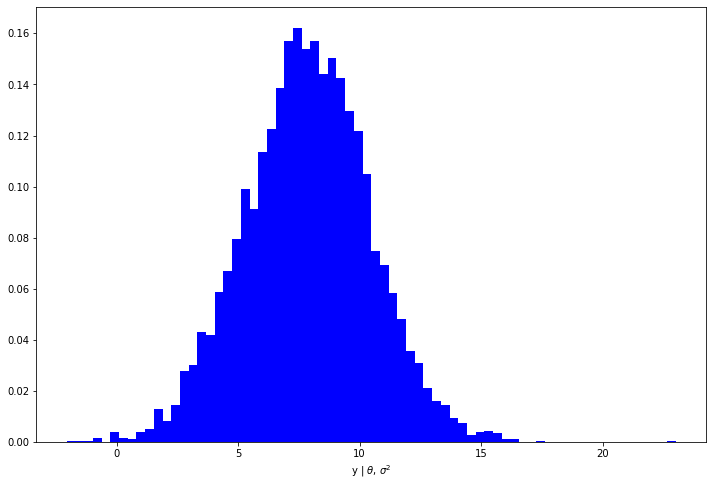

In [25]:
plt.figure(figsize=(12, 8))
plt.hist(y, bins = 70, color='blue', density = True)
plt.xlabel(r'y | $\theta$, $\sigma^2$')
plt.show()

In [27]:
pdf_sort = pdf_kde.copy()
pdf_sort.sort()
pdf_sort = pdf_sort[::-1]
pdf_sort

array([1.55616031e-01, 1.55615502e-01, 1.55613144e-01, ...,
       4.20004109e-12, 3.72875225e-12, 3.30900934e-12])

In [28]:
i = 0
while True:
    i += 1
    if 0.01 * pdf_sort[0:i].sum()>= 0.75:    
        break
        
pdf_H1 = pdf_sort[i-1]
pdf_H2 = pdf_sort[i]

In [29]:
CI_H = [np.round(y[np.where(pdf_kde == pdf_H1)][0],2), np.round(y[np.where(pdf_kde == pdf_H2)][0],2)]
CI_H.reverse()
CI_H

[4.87, 7.9]

# 2번

In [30]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt

## (a)

In [31]:
P = np.array([[0.5, 0.5, 0, 0, 0, 0],
              [0.1, 0.5, 0.4, 0, 0, 0],
              [0, 0.2, 0.5, 0.3, 0, 0],
              [0, 0, 0.3, 0.5, 0.2, 0],
              [0, 0, 0, 0.4, 0.5, 0.1],
              [0, 0, 0, 0, 0.5, 0.5]])

## (b)

In [3]:
P10=P
for i in range(10):
    P10=P10.dot(P)
print(P10)

[[0.04581862 0.19763594 0.33704986 0.28341519 0.11713152 0.01894886]
 [0.03952719 0.18063857 0.32815787 0.29593513 0.13231494 0.0234263 ]
 [0.03370499 0.16407894 0.31832745 0.30757955 0.14796756 0.02834152]
 [0.02834152 0.14796756 0.30757955 0.31832745 0.16407894 0.03370499]
 [0.0234263  0.13231494 0.29593513 0.32815787 0.18063857 0.03952719]
 [0.01894886 0.11713152 0.28341519 0.33704986 0.19763594 0.04581862]]


In [4]:
P50=P
for i in range(50):
    P50=P50.dot(P)
print(P50)

[[0.03125178 0.15625535 0.31250357 0.31249643 0.15624465 0.03124822]
 [0.03125107 0.15625321 0.31250214 0.31249786 0.15624679 0.03124893]
 [0.03125036 0.15625107 0.31250071 0.31249929 0.15624893 0.03124964]
 [0.03124964 0.15624893 0.31249929 0.31250071 0.15625107 0.03125036]
 [0.03124893 0.15624679 0.31249786 0.31250214 0.15625321 0.03125107]
 [0.03124822 0.15624465 0.31249643 0.31250357 0.15625535 0.03125178]]


In [6]:
P100=P
for i in range(100):
    P100=P100.dot(P)
print(P100)

[[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]]


## (c)

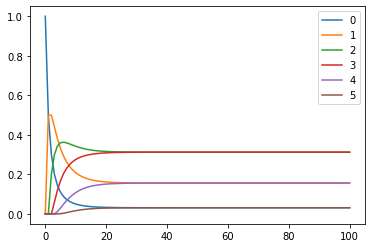

In [7]:
state1=np.array([[1,0,0,0,0,0]])
state1_hist=state1

for i in range(100):
    state1=np.dot(state1, P)
    state1_hist=np.append(state1_hist, state1, axis=0)

state1_hist=pd.DataFrame(state1_hist)
state1_hist.plot()
plt.show()

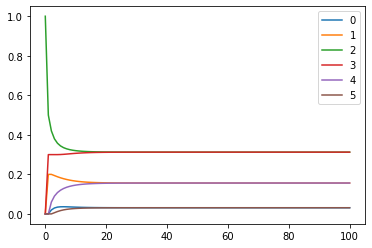

In [8]:
state2=np.array([[0,0,1,0,0,0]])
state2_hist=state2

for i in range(100):
    state2=np.dot(state2, P)
    state2_hist=np.append(state2_hist, state2, axis=0)

state2_hist=pd.DataFrame(state2_hist)
state2_hist.plot()
plt.show()


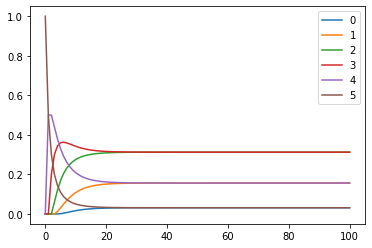

In [10]:
state3=np.array([[0,0,0,0,0,1]])
state3_hist=state3

for i in range(100):
    state3=np.dot(state3, P)
    state3_hist=np.append(state3_hist, state3, axis=0)

state3_hist=pd.DataFrame(state3_hist)
state3_hist.plot()
plt.show()

## (d)

In [11]:
np.random.seed(1)
chain=0
chainHist=chain
for i in range(50000):
    pb=P[chain]
    pb=np.array(pb).flatten()
    chain=np.random.choice(6,1,p=pb)
    chainHist=np.append(chainHist,chain)

count={}
for i in chainHist:
    try: count[i] += 1
    except: count[i]=1
print(count)

{0: 1632, 1: 7964, 2: 15564, 3: 15426, 4: 7901, 5: 1514}


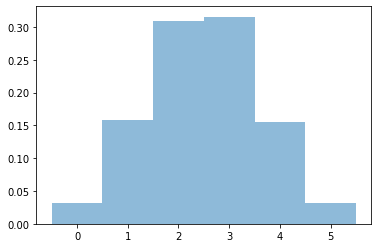

In [13]:
plt.figure()
bi=np.random.binomial(5, 0.5, 50000)
plt.hist(bi,bins=np.linspace(-0.5,5.5,7), alpha=0.5, density=True)
plt.show()

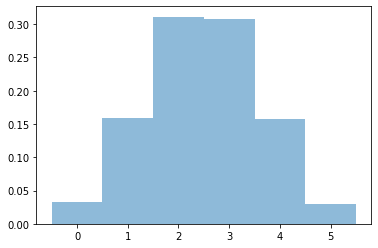

In [14]:
plt.figure()
plt.hist(chainHist, bins=np.linspace(-0.5,5.5,7),alpha=0.5, density=True)
plt.show()

In [15]:
P_b=np.zeros(6)
P_b

array([0., 0., 0., 0., 0., 0.])

In [16]:
P_b=np.zeros(6)
for i,j in enumerate(count.keys()):
    P_b[j]=count[i]
    
P_b=P_b/50000
P_b

array([0.03264, 0.15928, 0.31128, 0.30852, 0.15802, 0.03028])

In [17]:
np.array(state1_hist.iloc[99,])

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])